<h1><center> Régression Linéaire Simple, Multiple et Polynomiale avec Scikit-Learn </center></h1>


# Régression Linéaire Simple
<br><br>



## 1. Importez les bibliothéques necessaires 

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

## 2. Importez le jeu de données 'Salaire_Experience.csv'

In [2]:
salexp = pd.read_csv("data_reg_lmp/Salaire_Experience.csv", sep = ",")
salexp.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [3]:
salexp.shape

(30, 2)

## 3. Notre variable target (Y) est le salaire, Récuprer X et Y à partir du jeu de données 

In [4]:
X = salexp.iloc[:,0:1].values
y = salexp.iloc[:,1].values

print(X.shape,y.shape)

(30, 1) (30,)


## 4. Fractionnement le jeu de données en jeu d'entraînement et jeu de test (1/3 pour le test)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3)

print("X train set :", X_train.shape)
print("X test set :", X_test.shape)
print("y train set :", y_train.shape)
print("y test set :", y_test.shape)

X train set : (20, 1)
X test set : (10, 1)
y train set : (20,)
y test set : (10,)


## 5. Créer votre modèle LinearRegression et entraînez le sur les données d'entraînement

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #s'execute avec la méthode des moindres carrés

# entrainement du modèle : méthode "fit" sur le train set
model.fit(X_train, y_train)

# évaluation du modèle : méthode "score" sur le test set
model.score(X_test, y_test)

0.9668388979904533

## 6. Predire les résultats du modèle sur l'ensemble du test

In [7]:
# prédiction des résultats du modèle : méthode "predict". on fait une prédiction sur le Test set, pour pouvoir le comparer avec les résultats réels
y_pred = model.predict(X_test)

## 7. Visualisation des résultats du modèle sur les données d'entraînement

Text(0, 0.5, 'Salaire')

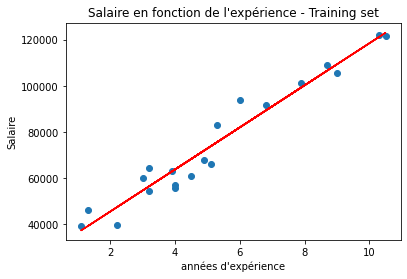

In [8]:
predictions_train = model.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, predictions_train, c="r")
plt.title('Salaire en fonction de l\'expérience - Training set')
plt.xlabel('années d\'expérience')
plt.ylabel('Salaire')

## 8. Visualisation des résultats du modèle sur les données de test

Text(0, 0.5, 'Salaire')

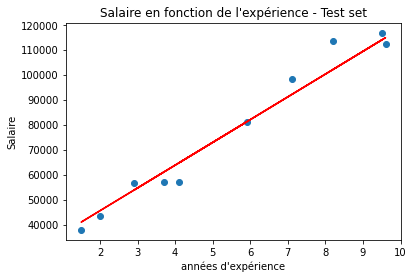

In [9]:
predictions_test = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions_test, c="r")
plt.title('Salaire en fonction de l\'expérience - Test set')
plt.xlabel('années d\'expérience')
plt.ylabel('Salaire')

## 9. Evaluez votre modèle par le mean_squared_error et mean_absolute_error

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

28378174.860059828

In [11]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

4295.733489497203

<br><br>
# Régression Linéaire Multiple
<br><br>


## 1. Importez le jeu de données 'Startups.csv'

In [12]:
startups = pd.read_csv("data_reg_lmp/Startups.csv", sep=",")

startups.shape

(50, 5)

In [13]:
startups.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


##  2. Notre variable target (Y) est le profit, Récuprer X et Y à partir du jeu de données 

In [14]:
y = startups.iloc[:,4:5].values
X = startups.iloc[:,0:4].values

print(y.shape)
print(X.shape)

(50, 1)
(50, 4)


## 3. Encoder les variables qualitatives

In [15]:
from sklearn.preprocessing import LabelEncoder

# variables qualitatives : State, colonne 3
encoder = LabelEncoder()
X[:,3] = encoder.fit_transform(X[:,3])
print(X[:,3])

[2 0 1 2 1 2 0 1 2 0 1 0 1 0 1 2 0 2 1 2 0 2 1 1 2 0 1 2 1 2 1 2 0 1 0 2 1
 0 2 0 0 1 0 2 0 2 1 0 2 0]


## 4. Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)

In [16]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

print("X train set :", X_train.shape)
print("X test set :", X_test.shape)
print("y train set :", y_train.shape)
print("y test set :", y_test.shape)

y_train.reshape(-1, 1)
y_test.reshape(-1, 1)

X train set : (40, 4)
X test set : (10, 4)
y train set : (40, 1)
y test set : (10, 1)


array([[107404.34],
       [103282.38],
       [ 96712.8 ],
       [ 97427.84],
       [ 77798.83],
       [146121.95],
       [108552.04],
       [144259.4 ],
       [125370.37],
       [ 89949.14]])

## 5. Standariser les variables d'entrainement et de test

In [17]:
# Standardisation : mettre toutes les données quantitatives sur une même échelle

from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler()
scalerY = StandardScaler()
#scalerX.fit_transform(X)
#scalerY.fit_transform(y)
scalerX.fit_transform(X_train)
scalerY.fit_transform(y_train)
scalerX.fit_transform(X_test)
scalerY.fit_transform(y_test)

array([[-0.10715789],
       [-0.30058342],
       [-0.60886503],
       [-0.57531133],
       [-1.49641478],
       [ 1.70968994],
       [-0.05330136],
       [ 1.62228863],
       [ 0.7359092 ],
       [-0.92625396]])

## 6. Créer votre modèle LinearRegression multiple et entraînez le sur les données d'entraînement

In [18]:
#from sklearn.linear_model import LinearRegression

model = LinearRegression() #s'execute avec la méthode des moindres carrés

# entrainement du modèle : méthode "fit" sur le train set
model.fit(X_train, y_train)

# évaluation du modèle : méthode "score" sur le test set
model.score(X_test, y_test)

0.8973640844083466

## 7. Predire les résultats du modèle sur l'ensemble du test

In [19]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## 8. Visualisation des résultats du modèle sur les données d'entraînement en 3D avec les deux variable R&D Spend et Marketing Spend

In [20]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
# profit : colonne 4, en fonction de R&DSpend : colonne 0 et MarketingSpend : colonne 2
#       y                               X[:,0]                        X[:,2]                     
fig = plt.figure()
ax =plt.axes(projection="3d")
ax.scatter3D(X_train[:,0], X_train[:,2], y_train)
ax.scatter3D(X_train[:,0], X_train[:,2], y_pred_train)

<IPython.core.display.Javascript object>

In [21]:
# ax.scatter(X_train[:,0], X_train[:,2], y_train, c=X_train[:,3]) -> pour rajouter couleurs en fonction d'une 4eme donnée

## 9. Visualisation des résultats du modèle sur les données de test en 3D avec les deux variable R&D Spend et Marketing Spend

In [22]:
fig = plt.figure()
ax =plt.axes(projection="3d")
ax.scatter3D(X_test[:,0], X_test[:,2], y_test)
ax.scatter3D(X_test[:,0], X_test[:,2], y_pred_test)

<IPython.core.display.Javascript object>

## 10. Evaluez votre modèle par le mean_squared_error


In [23]:
#from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

46610024.85070775

<br><br>
# Régression Polynomiale
<br><br>

## 1. Importez le jeu de données 'Salaire_Level.csv'

In [24]:
nivsal = pd.read_csv("data_reg_lmp/Salaire_Level.csv", sep = ",")



## 2. Notre variable target (Y) est le salaire, Récuprer X et Y à partir du jeu de données 

In [25]:
X = nivsal.iloc[:,1:2].values
y = nivsal.iloc[:,-1:].values

print(y.shape)
print(X.shape)

(10, 1)
(10, 1)


## 3. Créer votre modèle LinearRegression et entraînez le sur le jeu de données

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) - pas assez de données

modellin = LinearRegression()
modellin.fit(X, y)
modellin.score(X, y)

0.6690412331929895

## 4. Visualisation des résultats du modèle LinearRegression sur le jeu de données

In [27]:
y_predlin = modellin.predict(X)
y_predlin.shape

(10, 1)

In [28]:
plt.scatter(X,y)
plt.plot(X, y_predlin, c = 'red')
plt.ylabel('salaire')
plt.xlabel('position')
plt.title('Evolution du salaire en fonction de la position')
plt.grid(True)
plt.show()

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

## 5. Créer votre modèle Regression polynomiale et entraînez le sur le jeu de données, essayer avec différentes valeurs pour le degré (1..5). Visualiser dans la même figure les rélutats du modèle pour les différents degrés. Quelle est la meilleure valeur pour le degré ?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

colors = ['teal', 'yellowgreen', 'gold']

plt.scatter(X,y, c='r')
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_predpol = model.predict(X)
    plt.plot(X, y_predpol, color=colors[count], linewidth=1,
             label="degree %d" % degree)
plt.legend()

# la derniere courbe (degré5) est plus proche des observations

## 6. Faire la prédiction de la valeur 6 avec le modèle de régression linéaire simple et de régression polynomiale, qu'est ce que vous remarquez ?


In [ ]:
print(y[6]) # vraie valeur du salaire pour la position 6

print(y_predlin[6]) # valeur estimée avec la regression linéaire
print(y_predpol[6]) # valeur estimée avec la regression polynomiale de degré 5

In [ ]:
# la regression linéaire donne une prédiction très éloignée du résultat observé, 
# tandis que le prédiction de la regression polynomiale de degré 5 s'en rapproche fortement.